In [7]:
! pip install pandas openpyxl scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd

def load_data(filepath="./data/Canada examples data.xlsx"):
    """
    Loads and preprocesses the 'data_clustered_stats' sheet from the specified Excel file.

    - Reads only the 'data_clustered_stats' sheet
    - Skips the first column (column A)
    - Reads rows 2 through 55 (Excel row indices)
    
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    df = pd.read_excel(
        filepath,
        sheet_name="normalized",
        nrows=4990
    )
    df = df.iloc[:, 3:]
    df = df.fillna(0)
    return df

In [35]:
df = load_data()
print(df.shape)
df.head()

(4990, 40)


,Time spent in school,Which age group does your child fall under?,No. of media devices owned,Parent total media use- weekday,Parent total media use- weekend day,Average parent media use for work,Average parent media use for entertainment,Average parent media use for social networking,Average parent media use for personal development,First exposure to fixed screens (mths),...,Child age (total mths),Average sleep duration,"Poorer sleep quality on either day (1= unsatisfactory, 2= below average, 3= average, 4= above average, 5= excellent)",Total Health QofL (5-6 yrs),Physical functioning (5-6 yrs),Psychosocial health (5-6 yrs),< 1h of screen use,At least 3h of physical activity,10-13h of sleep,No. of guidelines met
0,0,5 to 6 years,2,16.0,21.00,4.00,8.00,4.00,2.500,13.0,...,65.0,9.0,5,78.260870,100.000,66.666667,NO,YES,NO,1
1,0,5 to 6 years,3,7.5,5.50,3.00,1.00,1.50,1.000,13.0,...,58.0,7.5,2,70.652174,53.125,80.000000,NO,NO,NO,0
2,0,5 to 6 years,3,8.0,5.50,2.00,3.25,1.00,0.500,24.0,...,56.0,8.5,5,70.652174,68.750,71.666667,YES,NO,NO,1
3,0,5 to 6 years,3,7.5,5.00,1.25,3.50,1.00,0.500,18.0,...,51.0,9.0,3,93.478261,96.875,91.666667,NO,NO,NO,0
4,0,5 to 6 years,4,6.5,5.25,1.50,2.00,1.75,0.625,24.0,...,61.0,10.0,5,82.608696,100.000,73.333333,YES,NO,YES,2


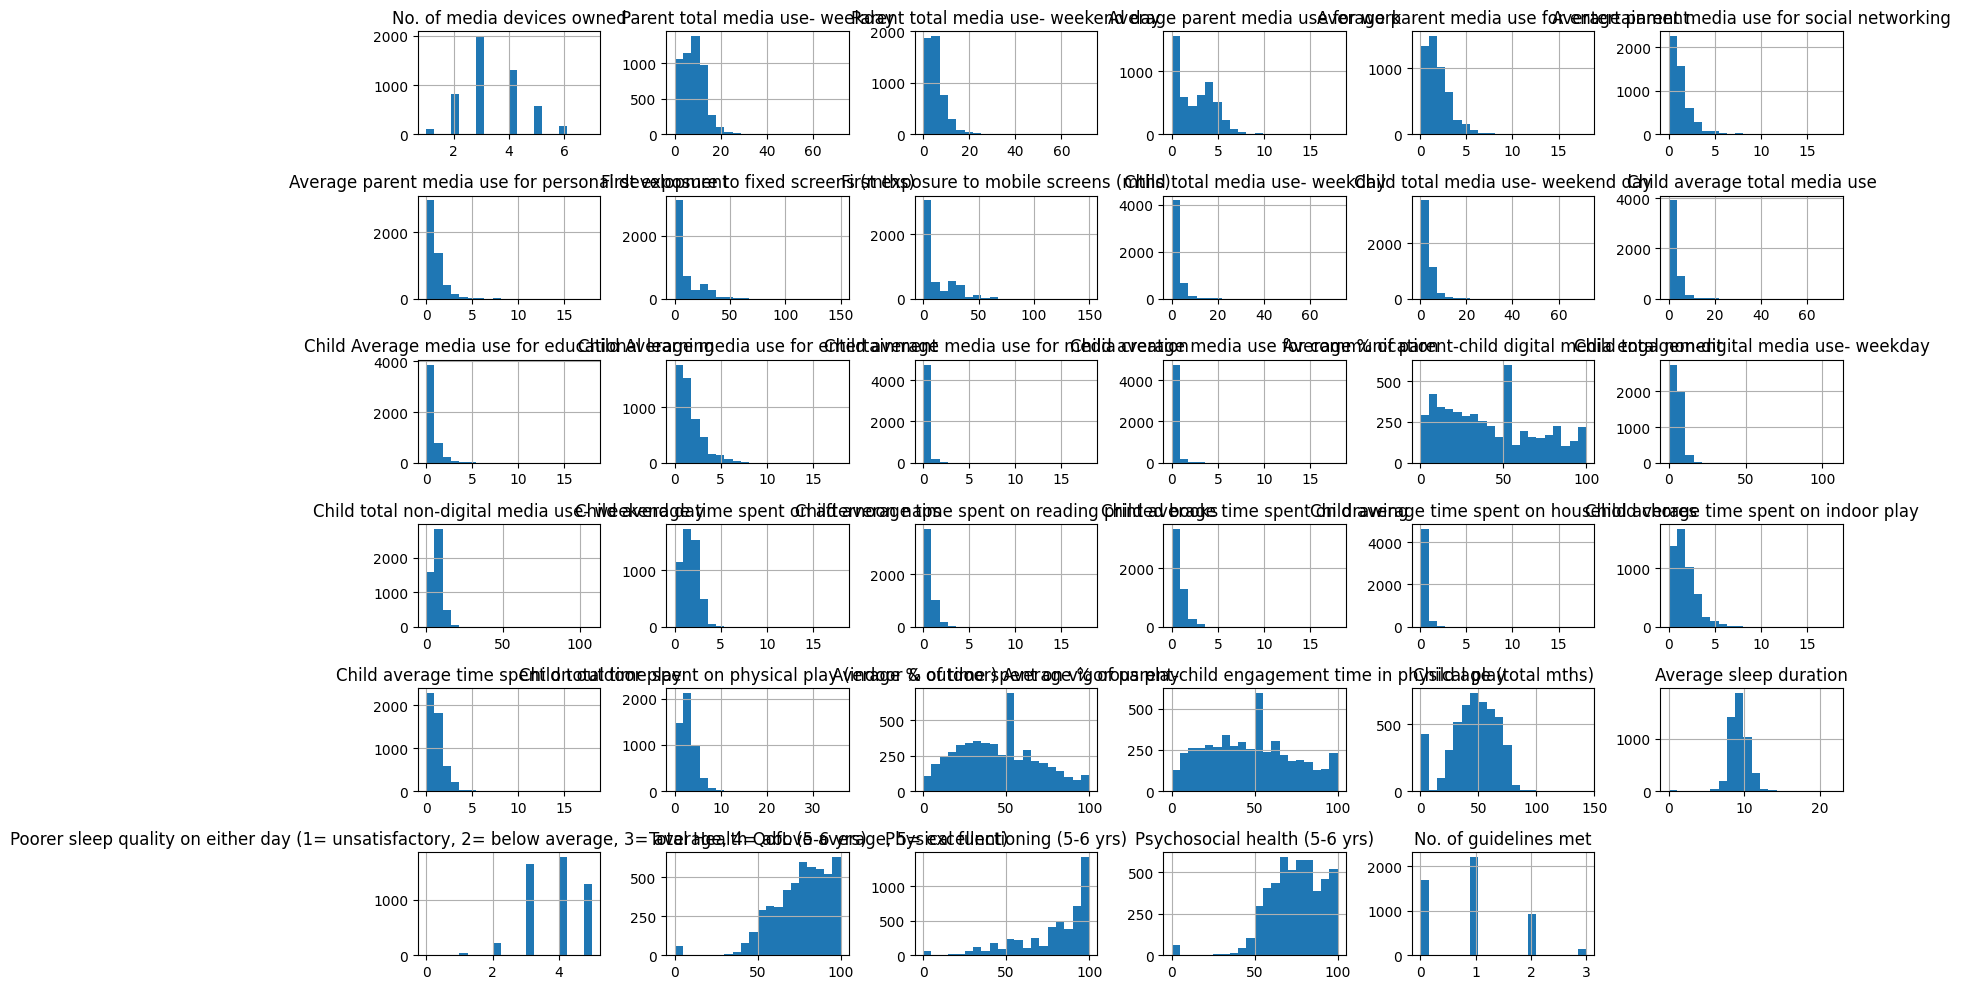

In [36]:
import matplotlib.pyplot as plt
# Visualize distributions for each column
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

In [39]:
def split_categories(df):
    """
    Splits the main dataframe into four category-specific dataframes:
    - combined (all columns)
    - physical_activity
    - screen_time
    - sleep

    You must manually define which columns belong to each category.

    Returns:
        dict of DataFrames: {'combined': df_all, 'physical_activity': df_pa, ...}
    """
    # --- Define your columns by category ---
    physical_cols = [
        'Child average time spent on reading printed books',
        'Child average time spent on drawing',
        'Child average time spent on household chores',
        'Child average time spent on indoor play',
        'Child average time spent on outdoor play',
        'Child total time spent on physical play (indoor & outdoor)',
        'Average % of time spent on vigorous play',
        'Average % of parent-child engagement time in physical play'
    ]

    screen_cols = [
        'First exposure to fixed screens (mths)',
        'First exposure to mobile screens (mths)',
        'Child total media use- weekday',
        'Child total media use- weekend day',
        'Child average total media use',
        'Child Average media use for educational learning',
        'Child Average media use for entertainment',
        'Child average media use for media creation',
        'Child average media use for communication',
        'Average % of parent-child digital media engagement'
    ]

    sleep_cols = [
        'Average sleep duration',
        'Poorer sleep quality on either day (1= unsatisfactory, 2= below average, 3= average, 4= above average, 5= excellent)',
        'Child average time spent on afternoon naps'
    ]

    # --- Slice each category ---
    df_combined = df.copy()
    df_physical = df[physical_cols].copy()
    df_screen = df[screen_cols].copy()
    df_sleep = df[sleep_cols].copy()

    return {
        'combined': df_combined,
        'physical_activity': df_physical,
        'screen_time': df_screen,
        'sleep': df_sleep
    }


In [40]:
df = load_data()
dfs = split_categories(df)

# Access individual categories
df_combined = dfs['combined']
df_pa = dfs['physical_activity']
df_screen = dfs['screen_time']
df_sleep = dfs['sleep']

# Example: check their shapes
print("Combined:", df_combined.shape)
print("Physical Activity:", df_pa.shape)
print("Screen Time:", df_screen.shape)
print("Sleep:", df_sleep.shape)


Combined: (4990, 40)
Physical Activity: (4990, 8)
Screen Time: (4990, 10)
Sleep: (4990, 3)
